Dimensionality reduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import sklearn

In [2]:
df = pd.read_csv('./dataset.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Star color'] = le.fit_transform(df['Star color'])
df['Spectral Class'] = le.fit_transform(df['Spectral Class'])
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,11,0
238,9235,404940.000000,1112.0000,-11.23,5,11,0


In [7]:
x = df.drop(['Spectral Class'], axis=1)
y = df['Spectral Class']
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535, -1.46385011,
         0.55935417],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376, -1.46385011,
         0.55935417],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308, -1.46385011,
         0.55935417],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, -1.43783157,  1.46385011,
         0.76275569],
       [-0.13243767,  1.66287782,  1.69517694, -1.48540283,  1.46385011,
         0.76275569],
       [ 2.87275403,  1.04834522,  2.99536993, -1.15906395,  1.46385011,
        -1.474661  ]])

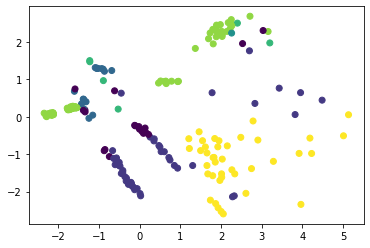

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


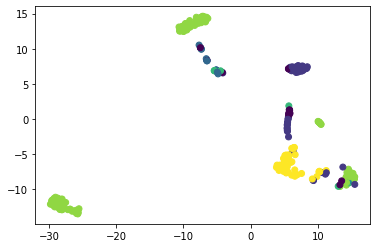

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scaled)
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)

Cluster Analysis

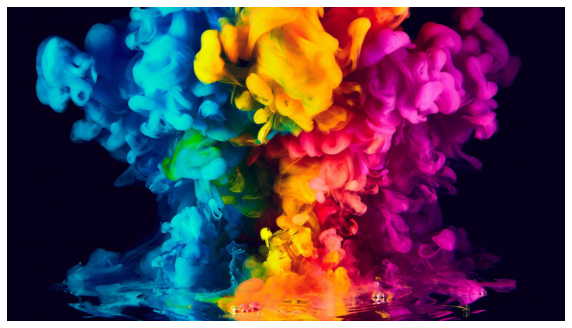

In [16]:
from PIL import Image
from sklearn.cluster import KMeans
img = Image.open('kmeans.jpg')
img = np.asarray(img)
img = img.astype(np.float64) / 255
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)

In [22]:
from sklearn.utils import shuffle
def kmeans(img, k):
  (w,h,d) = img.shape
  img = img.reshape(w*h, d)
  km = KMeans(n_clusters=k, random_state=0)
  training = shuffle(img, random_state=0, n_samples=1000)
  km.fit(training)
  img = km.predict(img)
  img = km.cluster_centers_[img].reshape(w, h, -1)
  # img = img.reshape(w,h,d)
  return img

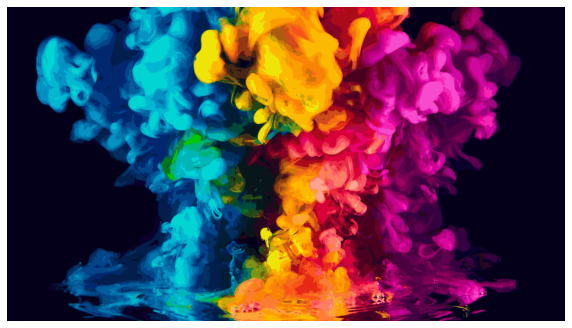

In [29]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(kmeans(img, 64))

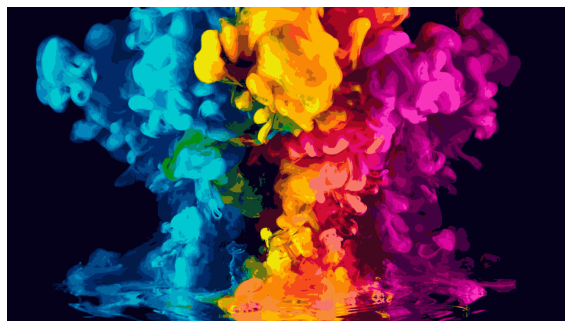

In [30]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(kmeans(img, 32))

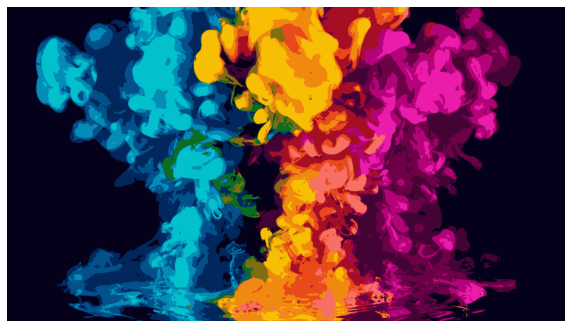

In [31]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(kmeans(img, 16))

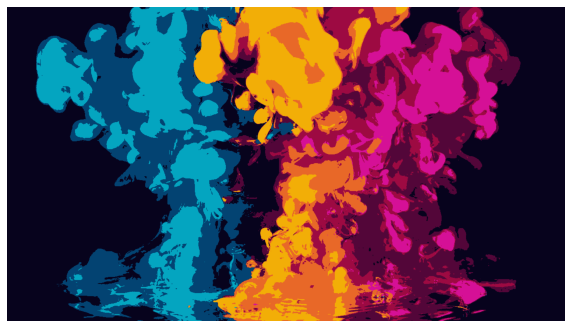

In [32]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(kmeans(img, 8))

Natural Language Processing

In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [47]:
texts = []
likes = []
with open('./Restaurant_Reviews.tsv') as f:
  for line in f.readlines():
    t,l = line.strip().split('\t')
    texts.append(t)
    likes.append(l)
df = pd.DataFrame({'texts':texts[1:], 'liked':likes[1:]})
df['liked'] = df['liked'].astype('int32')
df

,texts,liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [53]:
import re, string
def preprocess(text):
  text = text.lower()
  for c in string.punctuation:
    text = text.replace(c, ' ')
  tokens = word_tokenize(text)
  tokens2 = []
  for token in tokens:
    if token not in stopwords.words('english'):
      tokens2.append(token)
  return tokens2

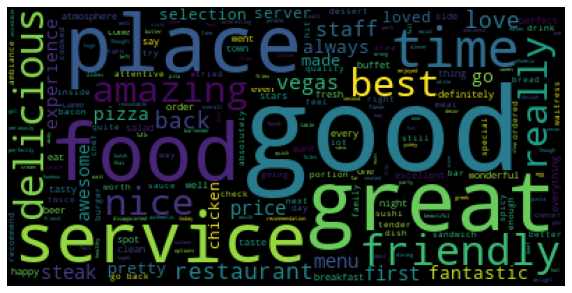

In [60]:
good = df[df['liked']==1]['texts']
tokens = []
for i in good:
  tokens+=preprocess(i)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(WordCloud().generate(' '.join(tokens)))

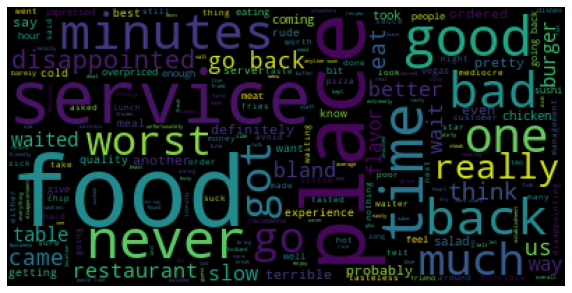

In [62]:
bad = df[df['liked']==0]['texts']
tokens = []
for i in bad:
  tokens+=preprocess(i)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(WordCloud().generate(' '.join(tokens)))

In [63]:
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer(max_df=500, min_df=10)
x = [' '.join(preprocess(t)) for t in df['texts']]
y = df['liked']
x_vect = vectorizer.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, train_size=0.8)
reg = LogisticRegression()
reg.fit(x_train, y_train)


LogisticRegression()

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
pred = reg.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       119
           1       0.61      0.70      0.65        81

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.71      0.69      0.70       200

